# Thématique 3 - Analyse bivariée entre variables qualitatives

### Importation des librairies

In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data pre-processing

In [31]:
# Préparation du fichier de données
filepath = "../data"
filename = "Chomage.xlsx"
file = os.path.join(filepath, filename)

# Lecture des données
df_original = pd.read_excel(file, skiprows=5)
df = df_original.copy()

# Affichage des indicateurs de positions et de dispersions
df.describe()

,Unnamed: 0,15-24,25-49,50 et +,Total,15-24.1,25-49.1,50 et +.1,Total.1
count,0.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000
mean,NaN,100.533333,333.066667,74.133333,507.733333,102.400000,363.533333,66.866667,532.80000
std,NaN,109.692090,343.728798,76.659916,524.063064,112.564257,373.987624,69.684135,549.74262
min,NaN,19.700000,56.400000,11.200000,87.300000,15.500000,40.400000,9.700000,65.60000
25%,NaN,27.425000,181.875000,30.200000,275.325000,28.775000,193.775000,25.200000,279.32500
50%,NaN,53.800000,184.550000,54.250000,281.050000,55.800000,236.150000,48.550000,331.80000
75%,NaN,130.200000,340.675000,73.950000,520.550000,134.200000,357.725000,69.425000,538.47500
max,NaN,301.600000,999.200000,222.400000,1523.200000,307.200000,1090.600000,200.600000,1598.40000


Ce jeu de données comptabilise la durée du chômage en fonction de l'âge tous sexes confondus. Ici nous ne pouvons pas compter directement le nombre d'individus car les variables sont qualitatives. Pour connaître le nombre d'individus de l'entreprise, il faudra calculer l'effectif total ou par lecture du tableau de contigence. Malgré tout, il y entre 19 et 301 personnes au chômage pour n'importe qu'elle durée.

In [32]:
df.head()

,Unnamed: 0,Unnamed: 1,15-24,25-49,50 et +,Total,15-24.1,25-49.1,50 et +.1,Total.1
0,NaN,Non renseigné,19.7,56.4,11.2,87.3,15.5,40.4,9.7,65.6
1,NaN,Moins de 3 mois,71.1,182.1,23.1,276.3,64.9,182.8,18.2,265.9
2,NaN,De 3 mois à 1 an,149.9,391.9,57.0,598.8,157.3,395.1,50.9,603.3
3,NaN,De 1 an à moins de 2 ans,36.5,187.0,51.5,275.0,46.7,226.7,46.2,319.6
4,NaN,2 ans et plus,24.4,181.8,79.6,285.8,22.8,245.6,75.6,344.0


In [33]:
df.tail()

,Unnamed: 0,Unnamed: 1,15-24,25-49,50 et +,Total,15-24.1,25-49.1,50 et +.1,Total.1
1,NaN,Moins de 3 mois,71.1,182.1,23.1,276.3,64.9,182.8,18.2,265.9
2,NaN,De 3 mois à 1 an,149.9,391.9,57.0,598.8,157.3,395.1,50.9,603.3
3,NaN,De 1 an à moins de 2 ans,36.5,187.0,51.5,275.0,46.7,226.7,46.2,319.6
4,NaN,2 ans et plus,24.4,181.8,79.6,285.8,22.8,245.6,75.6,344.0
5,NaN,Total,301.6,999.2,222.4,1523.2,307.2,1090.6,200.6,1598.4


In [34]:
df.shape

(6, 10)

In [35]:
df.dtypes

Unnamed: 0    float64
Unnamed: 1     object
15-24         float64
25-49         float64
50 et +       float64
Total         float64
15-24.1       float64
25-49.1       float64
50 et +.1     float64
Total.1       float64
dtype: object

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  6 non-null      object 
 2   15-24       6 non-null      float64
 3   25-49       6 non-null      float64
 4   50 et +     6 non-null      float64
 5   Total       6 non-null      float64
 6   15-24.1     6 non-null      float64
 7   25-49.1     6 non-null      float64
 8   50 et +.1   6 non-null      float64
 9   Total.1     6 non-null      float64
dtypes: float64(9), object(1)
memory usage: 608.0+ bytes


In [37]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', '15-24', '25-49', '50 et +', 'Total',
       '15-24.1', '25-49.1', '50 et +.1', 'Total.1'],
      dtype='object')

Explication des variables :
- Unnamed 0 et 1 : Variables créées par panda par lecture du tableau, mais ces variables n'existent pas dans le dataset
- 15-24, 25-49 et 50 et + : Nombre d'hommes au chômage par tranches d'âge
- Total: Total d'hommes au chômage
- 15-241, 25-49.1 et 50 et +.1 : Nombre de femmes au chômage par tranches d'âge
- Total.: Total de femmes au chômage

In [38]:
df.isnull().sum()

Unnamed: 0    6
Unnamed: 1    0
15-24         0
25-49         0
50 et +       0
Total         0
15-24.1       0
25-49.1       0
50 et +.1     0
Total.1       0
dtype: int64

### Préparation du tableau de données

In [39]:
# tableau avant préparation
df

,Unnamed: 0,Unnamed: 1,15-24,25-49,50 et +,Total,15-24.1,25-49.1,50 et +.1,Total.1
0,NaN,Non renseigné,19.7,56.4,11.2,87.3,15.5,40.4,9.7,65.6
1,NaN,Moins de 3 mois,71.1,182.1,23.1,276.3,64.9,182.8,18.2,265.9
2,NaN,De 3 mois à 1 an,149.9,391.9,57.0,598.8,157.3,395.1,50.9,603.3
3,NaN,De 1 an à moins de 2 ans,36.5,187.0,51.5,275.0,46.7,226.7,46.2,319.6
4,NaN,2 ans et plus,24.4,181.8,79.6,285.8,22.8,245.6,75.6,344.0
5,NaN,Total,301.6,999.2,222.4,1523.2,307.2,1090.6,200.6,1598.4


In [40]:
# Création du tableau df_eff par addition des rubriques femmes et hommes
df = pd.DataFrame({
    'Ancienneté de chômage': df['Unnamed: 1'],
    '15-24': df['15-24'] + df['15-24.1'],
    '25-49': df['25-49'] + df['25-49.1'],
    '50 et +': df['50 et +'] + df['50 et +.1']
})

# Affichage du nouveau DataFrame
print(df)

      Ancienneté de chômage  15-24   25-49  50 et +
0             Non renseigné   35.2    96.8     20.9
1           Moins de 3 mois  136.0   364.9     41.3
2          De 3 mois à 1 an  307.2   787.0    107.9
3  De 1 an à moins de 2 ans   83.2   413.7     97.7
4             2 ans et plus   47.2   427.4    155.2
5                     Total  608.8  2089.8    423.0


Maintenant que nous avons le tableau de contingence, nous allons pouvoir passer à la mise en place du test d'indépendance entre l'âge et l'ancienneté de chômage.

### Calcul des effectifs marginaux

In [41]:
# Création d'un tableau de fréquences
df_eff= df.copy()

# Calcul de la somme des lignes (Total)
df_eff['Total'] = df['15-24'] + df['25-49'] + df['50 et +']

print(df_eff)

      Ancienneté de chômage  15-24   25-49  50 et +   Total
0             Non renseigné   35.2    96.8     20.9   152.9
1           Moins de 3 mois  136.0   364.9     41.3   542.2
2          De 3 mois à 1 an  307.2   787.0    107.9  1202.1
3  De 1 an à moins de 2 ans   83.2   413.7     97.7   594.6
4             2 ans et plus   47.2   427.4    155.2   629.8
5                     Total  608.8  2089.8    423.0  3121.6


### Calcul des fréquences marginales

In [42]:
# Création d'un tableau de fréquences
df_freq = df_eff.copy()

total_general = df_eff[df_eff['Ancienneté de chômage'] == 'Total']['Total'].values[0].round(1)

# Calcul des fréquences de chaque case
df_freq[['15-24', '25-49', '50 et +', 'Total']] = df_freq[['15-24', '25-49', '50 et +', 'Total']] / total_general

# Affichage du tableau de fréquences
print(df_freq)

      Ancienneté de chômage     15-24     25-49   50 et +     Total
0             Non renseigné  0.011276  0.031010  0.006695  0.048981
1           Moins de 3 mois  0.043567  0.116895  0.013230  0.173693
2          De 3 mois à 1 an  0.098411  0.252114  0.034566  0.385091
3  De 1 an à moins de 2 ans  0.026653  0.132528  0.031298  0.190479
4             2 ans et plus  0.015120  0.136917  0.049718  0.201756
5                     Total  0.195028  0.669464  0.135507  1.000000


## Distance du Khi2
### Tableaux des effectifs observés vs théoriques

In [43]:
def compute_total(df):
    header = list(df.columns)
    header = [col for col in header if col != 'Ancienneté de chômage']

    # Calcul de la somme des lignes (eff_ligne)
    df['Total'] = 0

    for elt in header:
        df['Total'] += df[elt]

    # Calcul de la somme des colonnes (eff_colonne)
    eff_colonne = df[header].sum()
    eff_colonne['Total'] = sum(eff_colonne)

    # Ajout d'une ligne pour les "eff_colonne"
    df.loc['Total'] = eff_colonne

    return df

In [44]:
from scipy.stats import chi2_contingency as chi2_contingency

khi2, pval, ddl, contingent_theorique = chi2_contingency(df_eff[['15-24', '25-49', '50 et +']].iloc[:-1])

print("Tableau des effectifs observés :\n", df_eff)

# Création d'un tableau des effectifs théoriques
df_theorique = df.copy().iloc[:-1]
df_theorique[['15-24', '25-49', '50 et +']] = contingent_theorique

df_theorique = compute_total(df_theorique)

print("\nTableau des effectifs théoriques :\n", df_theorique)

Tableau des effectifs observés :
       Ancienneté de chômage  15-24   25-49  50 et +   Total
0             Non renseigné   35.2    96.8     20.9   152.9
1           Moins de 3 mois  136.0   364.9     41.3   542.2
2          De 3 mois à 1 an  307.2   787.0    107.9  1202.1
3  De 1 an à moins de 2 ans   83.2   413.7     97.7   594.6
4             2 ans et plus   47.2   427.4    155.2   629.8
5                     Total  608.8  2089.8    423.0  3121.6

Tableau des effectifs théoriques :
           Ancienneté de chômage       15-24        25-49     50 et +   Total
0                 Non renseigné   29.819810   102.361103   20.719086   152.9
1               Moins de 3 mois  105.744285   362.983585   73.472130   542.2
2              De 3 mois à 1 an  234.443388   804.763128  162.893484  1202.1
3      De 1 an à moins de 2 ans  115.963762   398.063519   80.572719   594.6
4                 2 ans et plus  122.828754   421.628665   85.342581   629.8
Total                       NaN  608.800000  20

### Tableaux des fréquences observés vs théoriques

In [45]:
khi2_freq, pval_freq, ddl_freq, contingent_theorique_freq = chi2_contingency(df_freq[['15-24', '25-49', '50 et +']].iloc[:-1])

print("Tableau des effectifs observés :\n", df_freq)

# Création d'un tableau des fréquences théoriques
df_freq_theorique = df.copy().iloc[:-1]
df_freq_theorique[['15-24', '25-49', '50 et +']] = contingent_theorique_freq

df_freq_theorique = compute_total(df_freq_theorique)
print("\nTableau des effectifs théoriques :\n", df_freq_theorique)

Tableau des effectifs observés :
       Ancienneté de chômage     15-24     25-49   50 et +     Total
0             Non renseigné  0.011276  0.031010  0.006695  0.048981
1           Moins de 3 mois  0.043567  0.116895  0.013230  0.173693
2          De 3 mois à 1 an  0.098411  0.252114  0.034566  0.385091
3  De 1 an à moins de 2 ans  0.026653  0.132528  0.031298  0.190479
4             2 ans et plus  0.015120  0.136917  0.049718  0.201756
5                     Total  0.195028  0.669464  0.135507  1.000000

Tableau des effectifs théoriques :
           Ancienneté de chômage     15-24     25-49   50 et +     Total
0                 Non renseigné  0.009553  0.032791  0.006637  0.048981
1               Moins de 3 mois  0.033875  0.116281  0.023537  0.173693
2              De 3 mois à 1 an  0.075104  0.257805  0.052183  0.385091
3      De 1 an à moins de 2 ans  0.037149  0.127519  0.025811  0.190479
4                 2 ans et plus  0.039348  0.135068  0.027339  0.201756
Total                

### Tableau des différences

In [46]:
# Copie du DataFrame original
df_diff = df.copy().iloc[:-1]

n = len(df_diff)

# Calcul de la différence
for elt in df_diff.columns:
    if elt != 'Ancienneté de chômage':
        df_diff[elt][:n] = ((df_theorique[elt][:n] - df[elt][:n]) ** 2) / df_theorique[elt][:n]

print(df_diff)

      Ancienneté de chômage      15-24     25-49    50 et +
0             Non renseigné   0.970712  0.302125   0.001580
1           Moins de 3 mois   8.656811  0.010118  14.087599
2          De 3 mois à 1 an  22.579117  0.392077  18.566018
3  De 1 an à moins de 2 ans   9.256893  0.614222   3.640733
4             2 ans et plus  46.566527  0.078999  57.181995


### Analyse du Khi2

In [47]:
def get_seuil(ddl):
    if ddl == 1:
        seuil = 3.84
    elif ddl == 2:
        seuil = 5.99
    elif ddl == 3:
        seuil = 7.82
    elif ddl == 4:
        seuil = 9.49
    elif ddl == 5:
        seuil = 11.07
    elif ddl == 6:
        seuil = 12.59
    elif ddl == 7:
        seuil = 14.07
    elif ddl == 8:
        seuil = 15.51
    elif ddl == 9:
        seuil = 16.92
    return seuil

seuil = get_seuil(ddl) # On enlève 1 au ddl car ici il considère la colonne eff_ligne et eff_colonne

print("Khi2 =", khi2)
print("ddl =", ddl)
print("Seuil =", seuil)

if (khi2 > seuil):
    print("\nLa distance du chi-deux est supérieure au seuil. On admet donc que les variables sont fortement liées.")
else:
    print("\nLa distance du chi-deux est inférieure au seuil. On peut dire que les variables sont indépendantes. Ce qui confirme ce qui a été observé avec les profils lignes et colonnes.")

Khi2 = 182.90552494171797
ddl = 8
Seuil = 15.51

La distance du chi-deux est supérieure au seuil. On admet donc que les variables sont fortement liées.


### Profils lignes

In [48]:
# Création d'un tableau de profils lignes
df_profil = df_eff.copy()

# # Renommer les colonnes dans df_profil
df_profil.loc[df_profil['Ancienneté de chômage'] == 'Total', 'Ancienneté de chômage'] = 'Profil ligne moyen'

# Total de chaque ligne
total_ligne = df_profil['Total']

# Calcul de chaque profil ligne
for elt in df_profil.columns:
    if elt != 'Ancienneté de chômage':
        df_profil[elt] /= total_ligne

# # Affichage du tableau des profils lignes
print(df_profil)

      Ancienneté de chômage     15-24     25-49   50 et +  Total
0             Non renseigné  0.230216  0.633094  0.136691    1.0
1           Moins de 3 mois  0.250830  0.672999  0.076171    1.0
2          De 3 mois à 1 an  0.255553  0.654688  0.089760    1.0
3  De 1 an à moins de 2 ans  0.139926  0.695762  0.164312    1.0
4             2 ans et plus  0.074944  0.678628  0.246427    1.0
5        Profil ligne moyen  0.195028  0.669464  0.135507    1.0


### Histogramme des profils lignes

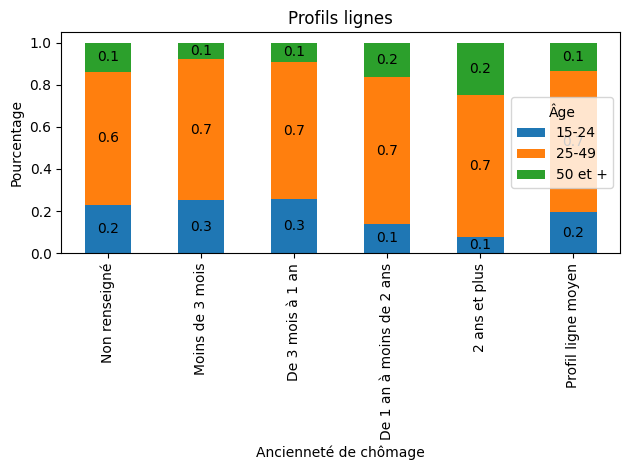

In [53]:
# Suppression de la colonne 'total' et de la ligne 'freq_marginale' si elles existent
df_profil_temp = df_profil.drop(columns=['Total'], errors='ignore')

# Tracé de l'histogramme empilé
ax = df_profil_temp.set_index('Ancienneté de chômage').plot(kind='bar', stacked=True)

# Ajouter les valeurs sur chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.001f', label_type='center')

plt.title('Profils lignes')
plt.ylabel('Pourcentage')
plt.xlabel('Ancienneté de chômage')
plt.legend(title='Âge')
plt.tight_layout()

# Affichage de l'histogramme
plt.show()

19% de l'échantillon sont des jeunes entre 15 et 24 ans, or on constate que cette répartition n'est pas respectée suivant la durée du chomage. Il y a plus de jeunes sur les petites durées de chomages (25% pour < 3 mois et 25,5%  pour <1 an) et nettement moins sur les longues durées (7,5% pour >2 ans).
A contrario, 13,5% de l'échantillon sont des personnes de plus de 50 ans et on en retrouve 24,6% pour les longues durées.

### Profils colonnes

In [50]:
# Création d'un tableau de profils colonnes
df_colonne = df_eff.copy()

# Renommer les colonnes dans df_colonne
df_colonne = df_colonne.rename(columns={'Total': 'Profil colonne moyen'})

# Calcul de chaque profil colonne
for elt in df_colonne.columns:
    if elt != 'Ancienneté de chômage':
        df_colonne[elt] /= df_colonne[elt][len(df_colonne) - 1]

# Affichage du tableau des profils lignes
print(df_colonne)

      Ancienneté de chômage     15-24     25-49   50 et +  \
0             Non renseigné  0.057819  0.046320  0.049409   
1           Moins de 3 mois  0.223390  0.174610  0.097636   
2          De 3 mois à 1 an  0.504599  0.376591  0.255083   
3  De 1 an à moins de 2 ans  0.136662  0.197962  0.230969   
4             2 ans et plus  0.077530  0.204517  0.366903   
5                     Total  1.000000  1.000000  1.000000   

   Profil colonne moyen  
0              0.048981  
1              0.173693  
2              0.385091  
3              0.190479  
4              0.201756  
5              1.000000  


### Histogramme des profils colonnes

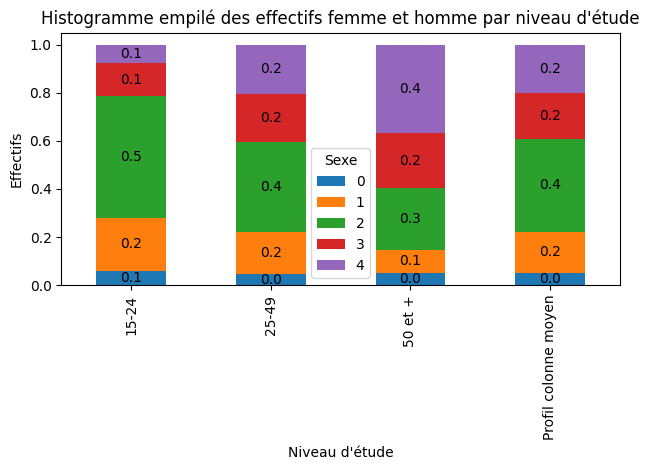

In [51]:
# Suppression de la colonne 'total' et de la ligne 'freq_marginale' si elles existent
# df_colonne_temp = df_colonne.drop(columns=['Profil colonne moyen'], errors='ignore')
df_colonne_temp = df_colonne[df_colonne['Ancienneté de chômage'] != 'Total']
df_colonne_temp = df_colonne_temp.reset_index(drop=True)

df_colonne_temp = df_colonne_temp.T

df_colonne_temp.iloc[1:] = df_colonne_temp.iloc[1:].astype(float)

# Tracé de l'histogramme empilé
ax = df_colonne_temp.iloc[1:].plot(kind='bar', stacked=True)

# Ajouter les valeurs sur chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.001f', label_type='center')

plt.title('Histogramme empilé des effectifs femme et homme par niveau d\'étude')
plt.ylabel('Effectifs')
plt.xlabel('Niveau d\'étude')
plt.legend(title='Sexe')
plt.tight_layout()

# Affichage de l'histogramme
plt.show()

Comme précédemment, on constate un rapprochement entre une durée de chomage courte et les jeunes d'un coté, et un rapprochement entre une durée de chomage longue et les plus de 50 ans d'un autre coté.
Par exemple, 20% de l'échantillon est au chomage depuis plus de 2 ans. Cette proportion descend à 7,7% chez les jeunes entre 15 et 24 ans et monte à 36,7% chez les plus de 50 ans.